# Section 1 Set Up
## 1.1 Package Import

In [57]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Decision tree visualization
import graphviz
import warnings

## 1.2 Data Collection

In [58]:
# read the csv file
# data_df = pd.read_csv('dataset_metric_bestpattern.csv')
data_df = pd.read_csv('input_features_with_best_patterns.csv')

# display 5 data item
data_df.head(5)

,dataset,HNs,HEs,pins,avgHEsize,sdHEsize,sd/avg,minHEsize,maxHEsize,avgHNdegree,sdHNdegree,minHnDegree,maxHnDegree,best_matching_pattern,best_merging_pattern,best_construction_pattern
0,sat_10pipe_d,2082017,77639,6164595,79.40080,337.04800,4.244894,2,9334,2.96088,8.16733,1,263,P3,P3,P2b
1,sat_10pipe,155278,2082017,6164595,2.96088,8.16733,2.758413,1,263,39.70040,169.86300,1,4672,P3,P1,P3
2,sat_10pipe_p,77639,2082017,6164595,2.96088,8.16733,2.758413,1,263,79.40080,337.04800,2,9334,P1,P1,P3
3,sat_11pipe_d,5584003,89315,16593705,185.78900,1696.43000,9.130950,2,57073,2.97165,10.28350,1,295,P3,P3,P2b
4,sat_11pipe,178630,5584003,16593705,2.97165,10.28350,3.460535,1,295,92.89430,849.19800,1,28538,P3,P1,P3


## 1.3 Create Sperate Data Frame for Different Task

In [59]:
# get dataset columns information
feature_list = list(data_df.columns)

# number of task
tasknum = 3

# split the dataset and store them back to the lists
df_list = []
class_list = feature_list[-tasknum:]

for taskid in range(tasknum): 
    df_list = df_list + [data_df[feature_list[:-tasknum] +[feature_list[-taskid-1]]]]

# reverse the order to match the label order
df_list = df_list[::-1]

# # change construction label
# # p2->p1 p2b->p2
# construction_df["construction"].loc[construction_df["construction"] == "P2"] = "P1"
# construction_df["construction"].loc[construction_df["construction"] == "P2b"] = "P2"

# # use list to store the dataset and corresponding task class
# df_list = [matching_df, merging_df, construction_df]
# class_list = ["matching","merging","construction"]

# Section 2 Data Analysis
## 2.1 Data General Information

In [60]:
# intial a list to store the label information
label_list =[]

# check the label in every class
for i in range(tasknum):
    print("Label in Class " + class_list[i] + ":")
    print(list(set(df_list[i][class_list[i]])))
    
    
    # store the label information
    label_list = label_list + [list(set(df_list[i][class_list[i]]))]
    label_list[i].sort()
    

Label in Class best_matching_pattern:
['P3', 'P1', 'P2']
Label in Class best_merging_pattern:
['P3', 'P1', 'P2']
Label in Class best_construction_pattern:
['P3', 'P2', 'P2b']


## 2.2 Data Visualization
Due to the larger feature space, current data is hard to visualize.

In [61]:
# # define the color list
# colorlist = ["red","green","blue","black"]

# # plot the data
# for i in range(3):
#     current_df = df_list[i]
#     for j in range(len(feature_list[i])):
#         currentclass_df = current_df[current_df[class_list[i]]==feature_list[i][j]]
#         ## use original data
#         # currentx = currentclass_df["avgsize"] 
#         # currenty = currentclass_df["avgsvd"] 
        
#         # use normalized data
#         currentx = currentclass_df["avgsize"] / max(currentclass_df["avgsize"])
#         currenty = currentclass_df["avgsvd"] / max(currentclass_df["avgsvd"])
        
#         # plot the current class data
#         plt.scatter(currentx, currenty,c=colorlist[j],label = feature_list[i][j])
        
#         # provide the basic information
#         plt.legend()
#         plt.title(class_list[i])
        
#         # # x,y label for original data
#         # plt.xlabel("avgsize")
#         # plt.ylabel("avgsvd")
        
#         # x,y label for normalized data
#         plt.xlabel("Normalized avgsize")
#         plt.ylabel("Normalized avgsvd")
        
#     # polt the current figure
#     plt.figure()


# Section 3: Model
## 3.1 Prepare the training data

In [62]:
# split the input to training set (X)

X = data_df[feature_list[1:-tasknum]]

# create training answer for three task class
y_list = []
for i in range(tasknum):
    y_list  = y_list + [df_list[i][class_list[i]]]

## 3.2 Model Test

In [63]:
# test all classical machine learning model
score_list = []

# define the tree depth
depth = 2

# for every task class
for i in range(tasknum):
    
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X, y_list[i])
    Y_pred = logreg.predict(X)
    acc_log = round(logreg.score(X, y_list[i]) * 100, 2) # Returns the mean accuracy on the given test data and labels.
    
    # Support Vector Machines
    svc = SVC()
    svc.fit(X, y_list[i])
    Y_pred = svc.predict(X)
    acc_svc = round(svc.score(X, y_list[i]) * 100, 2)
    
    # K Nearest Neighbor
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X, y_list[i])
    Y_pred = knn.predict(X)
    acc_knn = round(knn.score(X, y_list[i]) * 100, 2)
    
    # Gaussian Naive Bayes
    gaussian = GaussianNB()
    gaussian.fit(X, y_list[i])
    Y_pred = gaussian.predict(X)
    acc_gaussian = round(gaussian.score(X, y_list[i]) * 100, 2)
    
    # Perceptron
    perceptron = Perceptron()
    perceptron.fit(X, y_list[i])
    Y_pred = perceptron.predict(X)
    acc_perceptron = round(perceptron.score(X, y_list[i]) * 100, 2)
    
    # Linear SVC
    linear_svc = LinearSVC()
    linear_svc.fit(X, y_list[i])
    Y_pred = linear_svc.predict(X)
    acc_linear_svc = round(linear_svc.score(X, y_list[i])* 100, 2)
    
    # Stochastic Gradient Descent
    sgd = SGDClassifier()
    sgd.fit(X, y_list[i])
    Y_pred = sgd.predict(X)
    acc_sgd = round(sgd.score(X, y_list[i]) * 100, 2)
    
    # Decision Tree (Depth = d)
    decision_tree = DecisionTreeClassifier(max_depth = depth)
    decision_tree.fit(X, y_list[i])
    Y_pred = decision_tree.predict(X)
    acc_decision_tree1 = round(decision_tree.score(X, y_list[i]) * 100, 2)
    
     # Decision Tree (Depth = d+1)
    decision_tree = DecisionTreeClassifier(max_depth = depth + 1)
    decision_tree.fit(X, y_list[i])
    Y_pred = decision_tree.predict(X)
    acc_decision_tree2 = round(decision_tree.score(X, y_list[i]) * 100, 2)
    
    
    # store the current score information
    score_list = score_list +[[acc_svc, acc_knn, acc_log, acc_decision_tree1, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree2]]
    
# Naive Planing 
# Matching strategy: Choose P3
Y = y_list[0]
Y_pred = ["P3" for i in X["avgHEsize"]]
score = round(sum([Y[i] == Y_pred[i] for i in range(len(Y))])/len(Y)*100,2)
score_list[0].append(score)

# Merging strategy: if avgsize >= 25.0 or avgsvd >= 3.0 then P3, else P1
Y = y_list[1]
Y_pred = [0 for i in Y]
for i in range(len(Y)):
    if X.loc[i]["avgHEsize"]>=25.0 or X.loc[i]["sd/avg"] >= 3.0:
        Y_pred[i] = "P3"
    else:
        Y_pred[i] = "P1"
score = round(sum([Y[i] == Y_pred[i] for i in range(len(Y))])/len(Y)*100,2)
score_list[1].append(score)

# Construction strategy: if avg>=25.0 then P2b (encoded as P2)，else P3
Y = y_list[2]
Y_pred = [0 for i in Y]
for i in range(len(Y)):
    if X.loc[i]["avgHEsize"]>=25.0:
        Y_pred[i] = "P2"
    else:
        Y_pred[i] = "P3"
score = round(sum([Y[i] == Y_pred[i] for i in range(len(Y))])/len(Y)*100,2)
score_list[2].append(score)

/Users/zhs/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhs/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/zhs/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zhs/Library/Python/3.9/lib/python/si

## 3.3 Model Score Analysis

In [64]:
# compute the current average score
avgscore = []

for i in range(len(score_list[0])):
    avgscore = avgscore + [ round((score_list[0][i] + score_list[1][i]+ score_list[2][i])/3,2)]
    
# construct the table
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Decision Tree (Depth = {0})'.format(depth), 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree (Depth = {0})'.format(depth+1), "Naive Planning"],
class_list[0]:score_list[0],
class_list[1]:score_list[1],
class_list[2]:score_list[2],
'Avg Score' : avgscore})


# sort base on the average score
models.sort_values(by='Avg Score', ascending=False)

,Model,best_matching_pattern,best_merging_pattern,best_construction_pattern,Avg Score
8,Decision Tree (Depth = 3),75.61,86.99,81.50,81.37
1,KNN,80.89,82.72,78.25,80.62
3,Decision Tree (Depth = 2),74.19,84.15,79.47,79.27
2,Logistic Regression,70.93,83.33,72.56,75.61
9,Naive Planning,72.56,82.32,62.60,72.49
0,Support Vector Machines,72.56,68.50,63.21,68.09
7,Linear SVC,72.56,69.92,44.51,62.33
6,Stochastic Gradient Decent,64.02,70.12,43.29,59.14
4,Naive Bayes,27.24,60.98,37.20,41.81
5,Perceptron,42.28,19.92,61.99,41.40


# Section 4 Decision Tree Tuning
## 4.1 Depth Limitation Test

In [65]:
# define the list to store the score and depth information
score = [[0]*8, [0]*8, [0]*8]
depth_list = [2,3,4,5,6,7,8,9]

# test every depth and every task class
for i in range(tasknum):
    for d in range(len(depth_list)):
        depth = depth_list[d]
        
        # Decision Tree
        decision_tree = DecisionTreeClassifier(max_depth=depth)
        decision_tree.fit(X, y_list[i])
        Y_pred = decision_tree.predict(X)
        acc_decision_tree = round(decision_tree.score(X, y_list[i]) * 100, 2)
        score[i][d] = acc_decision_tree
        
# construct a result table
models = pd.DataFrame({"Max Tree Depth" : depth_list, class_list[0] : score[0],class_list[1] : score[1], class_list[2] : score[2]})

models

    

,Max Tree Depth,best_matching_pattern,best_merging_pattern,best_construction_pattern
0,2,74.19,84.15,79.47
1,3,75.61,86.99,81.50
2,4,77.44,90.24,82.11
3,5,78.86,92.68,82.52
4,6,80.08,95.73,83.54
5,7,81.71,97.36,85.98
6,8,82.72,98.98,89.84
7,9,85.98,99.59,92.28


## 4.2 Tree Structure Display

best_matching_pattern


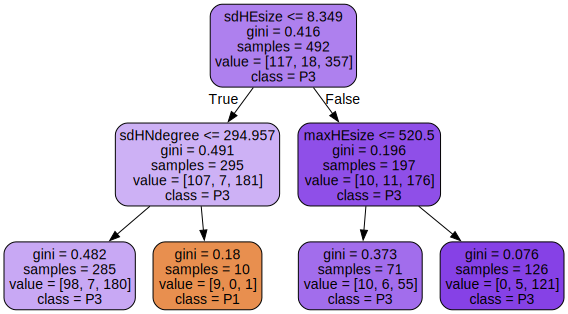

In [66]:
depth = 2
i = 0

print(class_list[i])
decision_tree = DecisionTreeClassifier(max_depth=depth)
decision_tree.fit(X, y_list[i])
dot_data = tree.export_graphviz(decision_tree, feature_names=feature_list[1:-tasknum], class_names=label_list[i], filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph
# graph.view()

best_merging_pattern


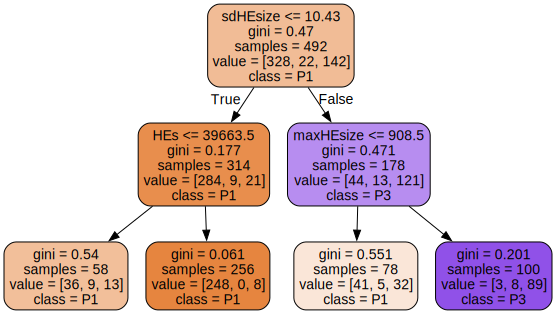

In [67]:
depth = 2
i = 1

print(class_list[i])
decision_tree = DecisionTreeClassifier(max_depth=depth)
decision_tree.fit(X, y_list[i])
dot_data = tree.export_graphviz(decision_tree, feature_names=feature_list[1:-tasknum], class_names=label_list[i], filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph
# graph.view()

best_construction_pattern


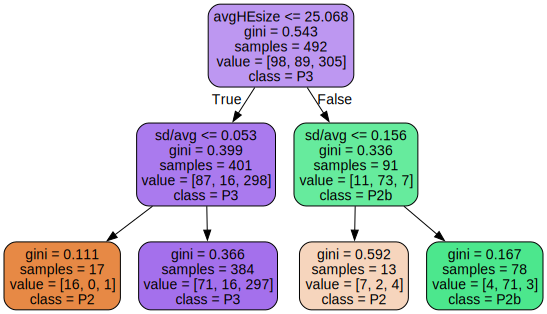

In [68]:
depth = 2
i = 2

print(class_list[i])
decision_tree = DecisionTreeClassifier(max_depth=depth)
decision_tree.fit(X, y_list[i])
dot_data = tree.export_graphviz(decision_tree, feature_names=feature_list[1:-tasknum], class_names=label_list[i], filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph
# graph.view()